# Naive Bayes

## Introduction

We will start by working on the Iris dataset. Recall that Iris dataset contains iris species and sepal and petal measurements. We will quickly explore the dataset and jump into Naive Bayes.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Question 1

* Load the Iris dataset.
* Take a quick look at the data types.
* Look at the skew values and decide if any transformations need to be applied. You can use skew value 0.75 as a threshold.
* Use `sns.pairplot` to plot the pairwise correlations and histograms. Use `hue="species"` as a keyword argument in order to see the distribution of species.

In [14]:
import pandas as pd
import numpy as np


filepath= 'https://raw.githubusercontent.com/yoel2000/Computational-learning/main/Data/Iris_Data.csv'

data = pd.read_csv(filepath)
print(data.columns,data.shape)
data.head()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object') (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Notice that aside from the predictor variable, everything is float.

*When a distribution is asymmetrical the tail of the distribution is skewed to one side-to the right or to the left.
When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve.
When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.*

In [4]:
skew = pd.DataFrame(data.skew())
print(skew)
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

                     0
sepal_length  0.314911
sepal_width   0.334053
petal_length -0.274464
petal_width  -0.104997


,skew,too_skewed
sepal_length,0.314911,False
sepal_width,0.334053,False
petal_length,-0.274464,False
petal_width,-0.104997,False


Fields are not too badly skewed.

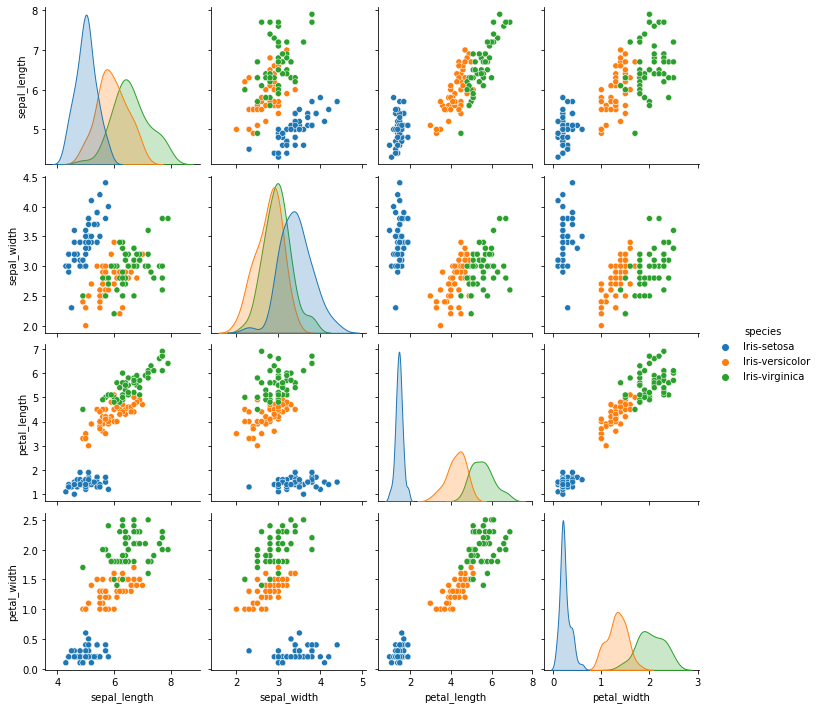

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(data, hue='species')

## Question 2

Let's now fit a Naive Bayes classifier to this data in order to predict "species".

* Pick the appropriate type of Naive Bayes given the nature of your dataset (data types of columns). Recall, choices are
    * GaussianNB
    * MultinomialNB
    * BernoulliNB
* Use `cross_val_score` to see how well your choice works.

In [6]:
# Since the features are continuous, the right choice is GaussianNB

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
X = data[data.columns[:-1]]
y = data.species

GNB = GaussianNB()
cv_N = 4
scores_gaussian = cross_val_score(GNB, X, y, n_jobs=cv_N, cv=cv_N)
print(scores_gaussian)
np.mean(scores_gaussian)

[0.94736842 0.94736842 0.91891892 1.        ]


0.9534139402560455

In the iris dataset, all the features are **continuous**. So, we must use the Gaussian Naive Bayes.

## Question 3:

Now let's try all types of Naive Bayes and observe what happens

* Compare the cross validation scores for Gaussian, Bernouilli and Multinomial Naive Bayes.
* Why is BernoulliNB performing like it does?

In [7]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
X = data[data.columns[:-1]]
y = data.species
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X, y, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'bernoulli': 0.3200568990042674,
 'gaussian': 0.9534139402560455,
 'multinomial': 0.966394025604552}


> Given the characteristics of the Iris dataset and each model, it is not surprising that the BernoulliNB model didn't do very well (because Bernoulli works when the data is binary). The larger surprise is that the MultinomialNB model did almost as well as the Gaussian model even though its an inappropriate choice for this dataset.



Looks like BernoulliNB results are very bad, but MultinomialNB is doing a very good job.

Why are the results of Bernoulli bad? Find out the reason.

## Question 4:

Let's see what happens when we take away the predictive features.

* Check the pairplot histograms (diagonal) you produced above and identify the two most predictive features visually.
* Remove the *petal_* features which are very predictive, and re-do the comparison above. That is, get the cross validation scores for all types of Naive Bayes.

In [10]:
X = data[['sepal_length', 'sepal_width']]
y = data.species

nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}

# Try other variants on the lines shown in the previous cell for GaussianNB and compare the results on scoring = 'accuracy'. 
# Run the piece of code as shown in array in question 3


In [11]:
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X, y, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'bernoulli': 0.3200568990042674,
 'gaussian': 0.7933854907539118,
 'multinomial': 0.6465149359886202}

#Come up with your observations after taking away the very predictive features, which model works better

## Question 5

This question explores how Naive Bayes algorithms can be affected when we push the underlying (naive) assumption too much. Recall that the naive assumption is that the features in the training set are *independent* from each other.

* Create **0, 1, 3, 5, 10, 50, 100** copies of `sepal_length` and fit a `GaussianNB` for each one.
* Keep track of the save the average `cross_val_score`.
* Create a plot of the saved scores over the number of copies.

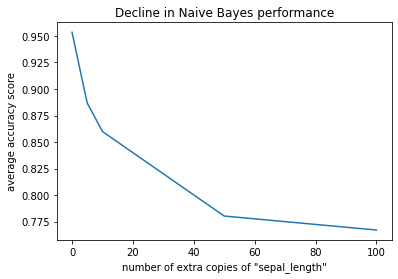

In [13]:
X = data[data.columns[:-1]]
y = data.species

n_copies = [0, 1, 3, 5, 10, 50, 100]


def create_copies_sepal_length(X, n):
    X_new = X.copy()
    for i in range(n):
        X_new['sepal_length_copy%s' % i] = X['sepal_length']
    return X_new


def get_cross_val_score(n):
    X_new = create_copies_sepal_length(X, n)
    scores = cross_val_score(GaussianNB(), X_new, y, cv=cv_N, n_jobs=cv_N)
    return np.mean(scores)


avg_scores = pd.Series(
    [get_cross_val_score(n) for n in n_copies],
    index=n_copies)

ax = avg_scores.plot()
ax.set(
    xlabel='number of extra copies of "sepal_length"',
    ylabel='average accuracy score',
    title='Decline in Naive Bayes performance');


## Question 6 - Naive Bayes on Human Activity Recongnition

In this question, we'll explore discretizing the dataset and then fitting MultinomialNB.  

* Load the Human Activity Recognition dataset. 
* Look at the data types. It's all continuous except for the target.
* Create `X` and `y` from `data`. `y` is the "Activity" column.
* Create training and test splits.
* Fit a GaussianNB to the training split.
* Get predictions on the test set.
* use `sns.heatmap` to plot the confusion matrix for predictions.

In [17]:
filepath= 'https://raw.githubusercontent.com/yoel2000/Computational-learning/main/Data/Human_Activity_Recognition_Using_Smartphones_Data.csv'
data = pd.read_csv(filepath)
data.head

<bound method NDFrame.head of        tBodyAcc-mean()-X  ...          Activity
0               0.288585  ...          STANDING
1               0.278419  ...          STANDING
2               0.279653  ...          STANDING
3               0.279174  ...          STANDING
4               0.276629  ...          STANDING
...                  ...  ...               ...
10294           0.310155  ...  WALKING_UPSTAIRS
10295           0.363385  ...  WALKING_UPSTAIRS
10296           0.349966  ...  WALKING_UPSTAIRS
10297           0.237594  ...  WALKING_UPSTAIRS
10298           0.153627  ...  WALKING_UPSTAIRS

[10299 rows x 562 columns]>

In [18]:
data.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object

In [35]:
X = data[data.columns[:-1]]
y = data.Activity

In [21]:
cv_N = 4
scores_gaussian = cross_val_score(GNB, X, y, n_jobs=cv_N, cv=cv_N)
print(scores_gaussian)
np.mean(scores_gaussian)

[0.73087379 0.71728155 0.77902913 0.77272727]


0.7499779346866724

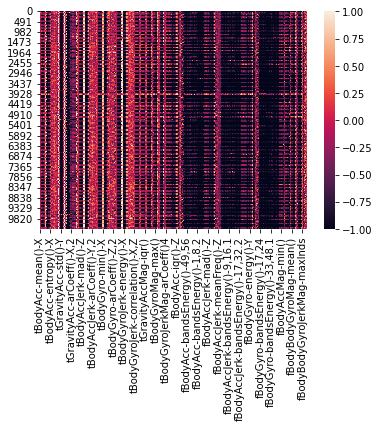

In [23]:
sns.heatmap(X)

## Question 7

Now, let's discretize the dataset from Question 6. There are many ways to do this, but we'll use `pd.DataFrame.rank(pct=True)`.

a. Create `X_discrete` from `X` using .rank(pct=True)

b. Look at the values. They are still not discrete. Modify `X_discrete` so that it is indeed discrete. (Hint: try to get the first 2 digits using `.applymap`)

c. Split `X_discrete` and `y` into training and test datasets

d. Fit a MultinomialNB to the training split.

e. Get predictions on the test set.

f. Plot the confusion matrix for predictions.

In [65]:
df = pd.DataFrame(X)
X_discrete = df.rank(pct=True)
for col in X_discrete.columns:
    X_discrete[col] = X_discrete[col].astype(str).str[:4].astype(float)
  
X_discrete

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.5,0.43,0.49,0.44,0.39,0.46,0.45,0.41,0.46,0.37,0.41,0.48,0.54,0.57,0.52,0.42,0.49,0.49,0.49,0.47,0.47,0.47,0.25,0.26,0.29,0.8,0.19,0.76,0.14,0.77,0.23,0.6,0.26,0.73,0.24,0.7,0.32,0.84,0.87,0.68,...,0.49,0.47,0.37,0.39,0.62,0.39,0.45,0.48,0.48,0.48,0.49,0.49,0.48,0.49,0.48,0.25,0.79,0.28,0.9,0.96,0.49,0.49,0.48,0.49,0.49,0.49,0.49,0.49,0.18,0.87,0.13,0.41,0.47,0.23,0.74,0.24,0.25,0.4,0.62,0.25
1,0.5,0.43,0.49,0.44,0.39,0.46,0.45,0.41,0.46,0.37,0.41,0.48,0.54,0.57,0.52,0.42,0.49,0.49,0.49,0.47,0.47,0.47,0.25,0.26,0.29,0.8,0.19,0.76,0.64,0.77,0.23,0.6,0.26,0.73,0.24,0.2,0.32,0.34,0.37,0.68,...,0.49,0.47,0.37,0.39,0.62,0.39,0.45,0.48,0.48,0.48,0.49,0.49,0.48,0.49,0.48,0.25,0.29,0.28,0.4,0.46,0.49,0.49,0.48,0.49,0.49,0.49,0.49,0.49,0.45,0.87,0.63,0.41,0.47,0.73,0.24,0.24,0.75,0.4,0.62,0.25
2,0.5,0.43,0.49,0.44,0.39,0.46,0.45,0.41,0.46,0.37,0.41,0.48,0.54,0.57,0.52,0.42,0.49,0.49,0.49,0.47,0.47,0.47,0.25,0.26,0.29,0.8,0.19,0.76,0.14,0.77,0.23,0.6,0.26,0.73,0.24,0.7,0.32,0.34,0.37,0.68,...,0.49,0.47,0.37,0.39,0.62,0.39,0.45,0.48,0.48,0.48,0.49,0.49,0.48,0.49,0.48,0.25,0.29,0.28,0.4,0.46,0.49,0.49,0.48,0.49,0.49,0.49,0.49,0.49,0.45,0.38,0.63,0.41,0.47,0.23,0.74,0.74,0.75,0.4,0.62,0.25
3,0.5,0.43,0.49,0.44,0.39,0.46,0.45,0.41,0.46,0.37,0.41,0.48,0.54,0.57,0.52,0.42,0.49,0.49,0.49,0.47,0.47,0.47,0.25,0.26,0.29,0.8,0.69,0.76,0.14,0.77,0.23,0.6,0.26,0.73,0.24,0.7,0.32,0.34,0.37,0.68,...,0.49,0.47,0.37,0.99,0.62,0.39,0.45,0.48,0.48,0.48,0.49,0.49,0.48,0.49,0.48,0.25,0.79,0.28,0.4,0.46,0.49,0.49,0.48,0.49,0.49,0.49,0.49,0.49,0.18,0.38,0.63,0.41,0.47,0.23,0.24,0.74,0.25,0.4,0.62,0.25
4,0.5,0.43,0.49,0.44,0.39,0.46,0.45,0.41,0.46,0.37,0.41,0.48,0.54,0.57,0.52,0.42,0.49,0.49,0.49,0.47,0.47,0.47,0.25,0.26,0.29,0.8,0.19,0.76,0.64,0.77,0.23,0.6,0.26,0.73,0.24,0.7,0.32,0.34,0.37,0.68,...,0.49,0.47,0.37,0.88,0.62,0.39,0.45,0.48,0.48,0.48,0.49,0.49,0.48,0.49,0.48,0.25,0.29,0.28,0.4,0.46,0.49,0.49,0.48,0.49,0.49,0.49,0.49,0.49,0.45,0.38,0.63,0.41,0.47,0.73,0.74,0.74,0.25,0.4,0.62,0.25
...,...,...,...,...,...,...,...,...,...,...

In [66]:
cv_N = 4
MNB = MultinomialNB()
score_multinomial = cross_val_score(MNB, X_discrete, y, n_jobs=cv_N, cv=cv_N)
print(score_multinomial)
np.mean(score_multinomial)

[0.85592233 0.82135922 0.8361165  0.83993784]


0.8383339745475669

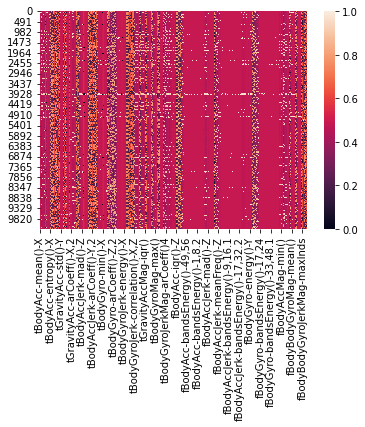

In [67]:
sns.heatmap(X_discrete)